In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant('Hello! tensorflow!')

In [4]:
sess=tf.Session()

In [5]:
print sess.run(hello)

Hello! tensorflow!


In [6]:
# Basic constant operators
a= tf.constant(2)
b= tf.constant(3)

In [7]:
with tf.Session() as sess:
    print "a : %i " % sess.run(a), "b : %i" % sess.run(b)
    print "Addition with constants : %i" % sess.run(a+b)
    print "Multiplication with constants : %i" %sess.run(a*b)

a : 2  b : 3
Addition with constants : 5
Multiplication with constants : 6


In [8]:
# Basic operations with variable as graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [9]:
add = tf.add(a,b)
mul = tf.multiply(a,b)

In [10]:
# Launching the default graph
with tf.Session() as sess:
    # Run every operation with variable input
    print "Addition with variables : %i" % sess.run(add, feed_dict={a: 2, b: 3})
    print "Multiplication with variables : %i" % sess.run(mul,feed_dict={a: 2, b: 3})

Addition with variables : 5
Multiplication with variables : 6


In [15]:
# Test Test test

c = tf.constant(6)
d = tf.constant(7)
with tf.Session() as sess:
    print "%i" %sess.run(c*d)

42


In [25]:

# Matrix multiplication using tensorflow

matrix1 = tf.constant([[2.,1.,1.,1.],[1.,1.,1.,1.],[1.,1.,1.,1.],[1.,1.,1.,1.]])


matrix2 = tf.constant([[1.,1.,1.,1.],[1.,1.,3.,1.],[1.,1.,1.,1.],[1.,1.,1.,1.]])

product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result = sess.run(product)
    print result

[[ 5.  5.  7.  5.]
 [ 4.  4.  6.  4.]
 [ 4.  4.  6.  4.]
 [ 4.  4.  6.  4.]]



## Linear Regression

In [28]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [29]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [30]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [32]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(),name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [33]:
pred = tf.add(tf.multiply(X,W),b)

In [35]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [36]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.190514207 W= 0.437989 b= -0.553835
Epoch: 0100 cost= 0.177396372 W= 0.426784 b= -0.473228
Epoch: 0150 cost= 0.165793598 W= 0.416246 b= -0.397416
Epoch: 0200 cost= 0.155530766 W= 0.406334 b= -0.326113
Epoch: 0250 cost= 0.146453157 W= 0.397012 b= -0.25905
Epoch: 0300 cost= 0.138424039 W= 0.388244 b= -0.195976
Epoch: 0350 cost= 0.131322324 W= 0.379998 b= -0.136654
Epoch: 0400 cost= 0.125040904 W= 0.372242 b= -0.0808593
Epoch: 0450 cost= 0.119485080 W= 0.364948 b= -0.0283832
Epoch: 0500 cost= 0.114571117 W= 0.358087 b= 0.0209719
Epoch: 0550 cost= 0.110224813 W= 0.351634 b= 0.0673917
Epoch: 0600 cost= 0.106380664 W= 0.345566 b= 0.111051
Epoch: 0650 cost= 0.102980696 W= 0.339858 b= 0.152113
Epoch: 0700 cost= 0.099973619 W= 0.334489 b= 0.190733
Epoch: 0750 cost= 0.097314022 W= 0.32944 b= 0.227056
Epoch: 0800 cost= 0.094961822 W= 0.324691 b= 0.261219
Epoch: 0850 cost= 0.092881501 W= 0.320225 b= 0.29335
Epoch: 0900 cost= 0.091041602 W= 0.316024 b= 0.32357
Epoch: 0950 cost= 0

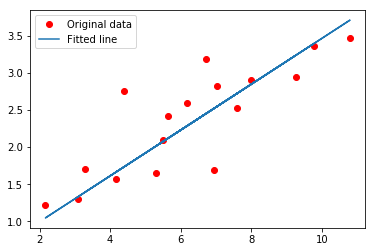

In [39]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()